In [2]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 234.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 13.1 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 7.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.3 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.9 MB/s eta 0:00:00


In [1]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Writes a WAV file of rendered data
def wavwrite(filename, samples, sample_rate):
    wav.write(filename, int(sample_rate), (32768.0 * samples).astype(np.int16))

def wavread(filename):
    sample_rate, samples = wav.read(filename)
    return samples.astype(np.float32) / 32768.0, sample_rate


In [17]:
#test_name = 'TestSineOsc'
#test_name = 'TestFilter'
#test_name = 'TestFilter24'
#test_name = 'TestFilterLFO'
#test_name = 'TestChorus'
#test_name = 'TestPulseOsc'
#test_name = 'TestPcm'
#test_name = 'TestSineEnv'
#test_name = 'TestAlgo'
#test_name = 'TestLFO'
#test_name = 'TestPartial'
#test_name = 'TestDuty'
#test_name = 'TestBrass'
#test_name = 'TestSawUpOsc'
#test_name = 'TestGuitar'
#test_name = 'TestPcmShift'
#test_name = 'TestPcm'
#test_name = 'TestOverload'
test_name = 'TestJunoPatch'
#test_name = 'TestJunoClip'
#test_name = 'TestLowVcf'
#test_name = 'TestGlobalEQ'
#test_name = 'TestFlutesEq'
#test_name = 'TestChainedOsc'
#d_ref, sr = wavread('tests/flt_ref/' + test_name + '.wav')
d_ref, sr = wavread('tests/ref/' + test_name + '.wav')
d_tst, sr = wavread('tests/tst/' + test_name + '.wav')
# Scale waveforms up to int16 units.
d_ref *= 32768
d_tst *= 32768

In [18]:
print(d_ref.shape)
tt = np.arange(d_ref.shape[0]) / sr

(44032, 2)


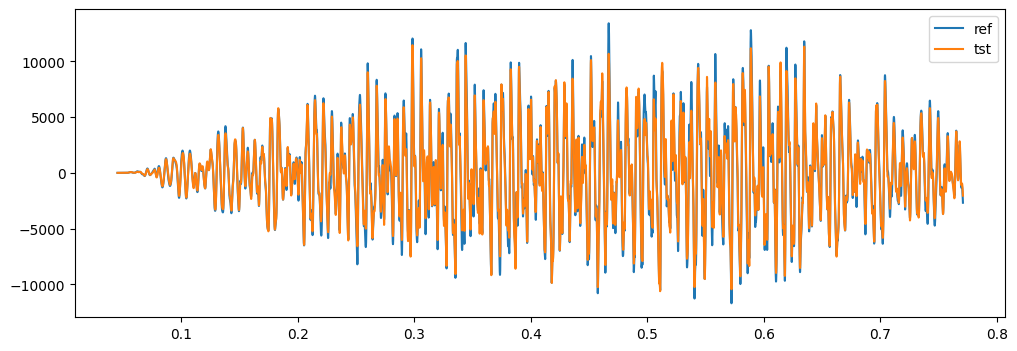

In [19]:
ii =  np.arange(2000, 34000)
#ii =  np.arange(38000, 42000)
#ii =  np.arange(24000, 28000)
plt.figure(figsize=(12,4))
plt.plot(tt[ii], d_ref[ii, 0], tt[ii], d_tst[ii, 0])
plt.legend(['ref', 'tst'])

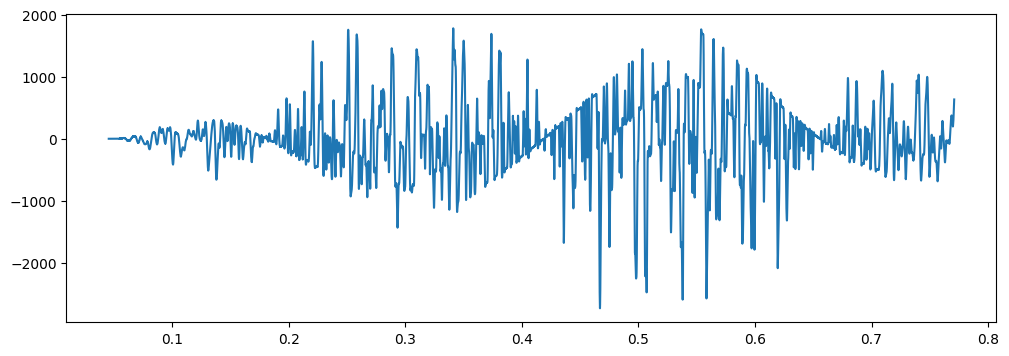

In [20]:
plt.figure(figsize=(12,4))
plt.plot(tt[ii], d_tst[ii, 0] - d_ref[ii, 0])

0


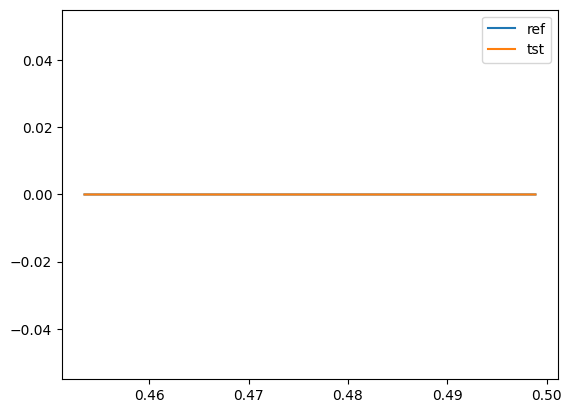

In [39]:
xcorr = np.correlate(np.mean(d_ref, axis=1), np.mean(d_tst, axis=1), mode='same')
center = np.argmax(xcorr)
offset = int(center - len(d_ref) / 2)
print(offset)
ii = np.arange(20000, 22000)
plt.plot(tt[ii], d_ref[ii, 0], tt[ii], d_tst[ii - offset, 0])
plt.legend(['ref', 'tst'])


In [23]:
print(np.log2(np.exp(3.0)))

4.328085122666891


In [24]:
print(np.log2(0.0002) * 8)
print(34/8)
print(75/8)

-98.30169903639559
4.25
9.375
